Step 1: Dataset: Telephone Churn
Step 2: Objective: Given the information about the customer classify whether a person is going to churn out or not

In [68]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [69]:
#loading dataset
df = pd.read_csv('telecom-dataset.csv')

In [70]:
#Data Preprocessing
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [71]:
df.shape

(3333, 21)

In [72]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [74]:
#finding missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Clearly there are no missing values present in the dataset. So we can proceed with Univariate analysis. For that we must first classify our attributes into two groups

Quantitative - Continious and Discrete Values

Categorical and boolean.

In order to do that

Find the frequency table of each attribute.

Plot the attributes and understand the distribution.

Now we have to understand which of the attributes is Quantitative and which is categorical or boolean.

Part 1: Finding out quantitative attributes

account length 3333 non-null int64
number vmail messages 3333 non-null int64
total day minutes 3333 non-null float64
total day calls 3333 non-null int64
total day charge 3333 non-null float64
total eve minutes 3333 non-null float64
total eve calls 3333 non-null int64
total eve charge 3333 non-null float64
total night minutes 3333 non-null float64
total night calls 3333 non-null int64
total night charge 3333 non-null float64
total intl minutes 3333 non-null float64
total intl charge 3333 non-null float64

Part 2:Find out categorical or boolean attributes

state 3333 non-null object
area code 3333 non-null int64
phone number 3333 non-null object
international plan 3333 non-null object
voice mail plan 3333 non-null object
churn 3333 non-null bool
customer service calls 3333 non-null int64
total intl calls 3333 non-null int64
Univariate Analysis

For quantitative variable we have to:

a. Find out the descriptive statistics for each attributes.

b. Plot Histogram, Kernel Density Plot(KDE) and Boxplot.

For categorical variable we have to:

a. Find out the frequency table for each attributes.

b. Plot Barchart.

In [75]:
numerical = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total eve minutes',
             'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls']

categorical = ['state', 'area code', 'international plan', 'voice mail plan', 'customer service calls', 'churn']

In [76]:
# Descriptive Statistics of Quantitative attributes
df.describe(include = ['float64', 'int64'])

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [77]:
# Descriptive statistics for categorical and boolean attributes
df.describe(include = ['object','bool'])

,state,phone number,international plan,voice mail plan,churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,365-5039,no,no,False
freq,106,1,3010,2411,2850


In [78]:
# Frequency table for categorical and boolean attributes
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
WA     66
CO     66
NV     66
MS     65
RI     65
MA     65
AZ     64
MO     63
FL     63
NM     62
ND     62
ME     62
NE     61
OK     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [79]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [80]:
df['international plan'].value_counts(
)

no     3010
yes     323
Name: international plan, dtype: int64

In [81]:
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [82]:
df['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

In [84]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

Histograms for quantitative variables

1. account length
2. number vmail messages
3. total day minutes
4. total day calls
5. total eve minutes
6. total eve calls
7. total night minutes
8. total night calls
9. total intl minutes
10. total intl calls

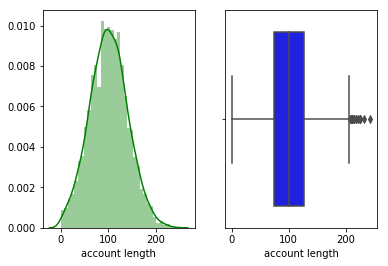

In [86]:
plt.subplot(121)
sns.distplot(df['account length'], color = 'green')
plt.subplot(122)
sns.boxplot(df['account length'], color = 'blue')
plt.show()

In [87]:
plt.close()

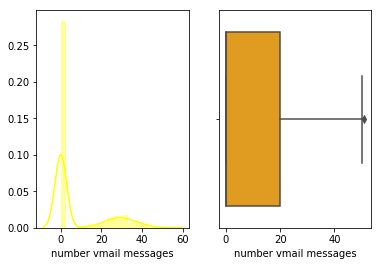

In [88]:
plt.subplot(121)
sns.distplot(df['number vmail messages'], color = 'yellow')
plt.subplot(122)
sns.boxplot(df['number vmail messages'], color = 'orange')
plt.show()

In [89]:
plt.close()

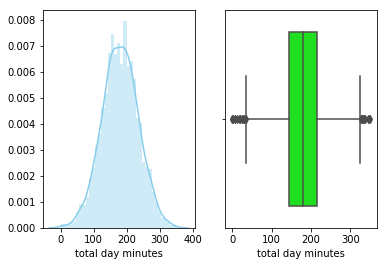

In [90]:
plt.subplot(121)
sns.distplot(df['total day minutes'], color = 'skyblue')
plt.subplot(122)
sns.boxplot(df['total day minutes'], color = 'lime')
plt.show()

In [91]:
plt.close()

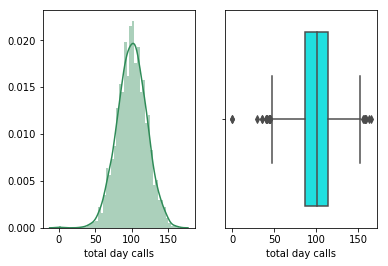

In [92]:
plt.subplot(121)
sns.distplot(df['total day calls'], color = 'seagreen')
plt.subplot(122)
sns.boxplot(df['total day calls'], color = 'cyan')
plt.show()

In [93]:
plt.close()

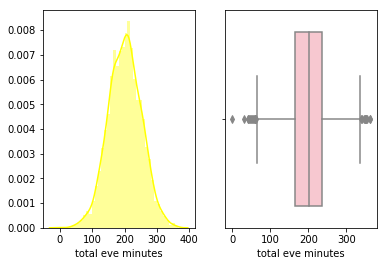

In [94]:
plt.subplot(121)
sns.distplot(df['total eve minutes'], color = 'yellow')
plt.subplot(122)
sns.boxplot(df['total eve minutes'], color = 'pink')
plt.show()

In [95]:
plt.close()

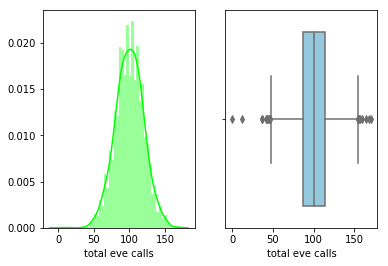

In [96]:
plt.subplot(121)
sns.distplot(df['total eve calls'], color = 'lime')
plt.subplot(122)
sns.boxplot(df['total eve calls'], color = 'skyblue')
plt.show()

In [97]:
plt.close()

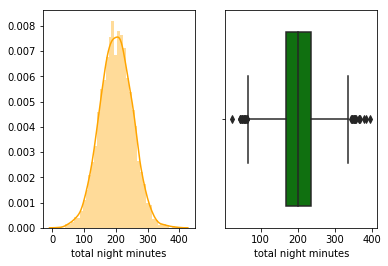

In [98]:
plt.subplot(121)
sns.distplot(df['total night minutes'], color = 'orange')
plt.subplot(122)
sns.boxplot(df['total night minutes'], color = 'green')
plt.show()

In [99]:
plt.close()

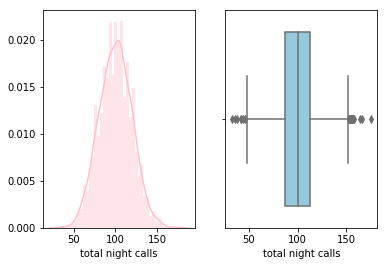

In [100]:
plt.subplot(121)
sns.distplot(df['total night calls'], color = 'pink')
plt.subplot(122)
sns.boxplot(df['total night calls'], color = 'skyblue')
plt.show()

In [101]:
plt.close()

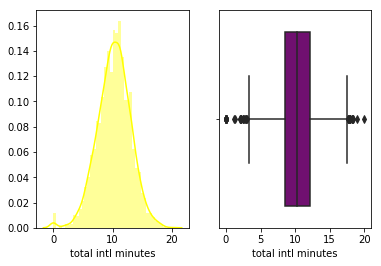

In [102]:
plt.subplot(121)
sns.distplot(df['total intl minutes'], color = 'yellow')
plt.subplot(122)
sns.boxplot(df['total intl minutes'], color = 'purple')
plt.show()

In [103]:
plt.close()

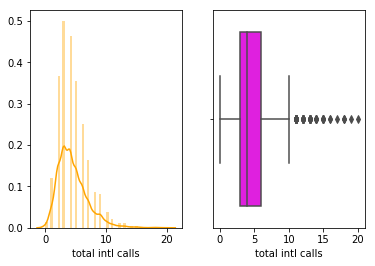

In [104]:
plt.subplot(121)
sns.distplot(df['total intl calls'], color = 'orange')
plt.subplot(122)
sns.boxplot(df['total intl calls'], color = 'magenta')
plt.show()

In [105]:
plt.close()

Bar Plot for Categorical Variables

1. state
2. area code
3. international plan
4. voice mail plan
5. customer service calls
6. churn

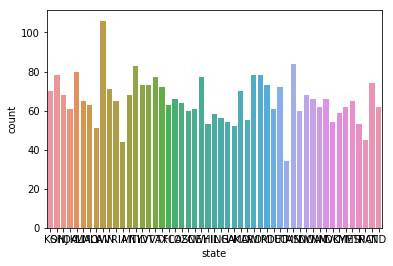

In [106]:
sns.countplot(df['state'])
plt.show()

In [107]:
plt.close()

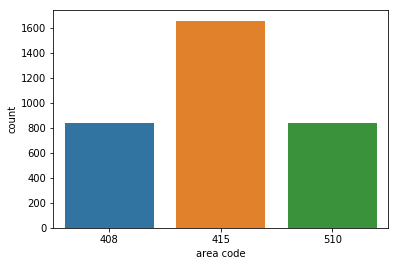

In [108]:
sns.countplot(df['area code'])
plt.show()

In [109]:
plt.close()

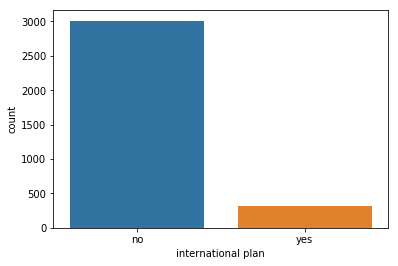

In [110]:
sns.countplot(df['international plan'])
plt.show()

In [111]:
plt.close()

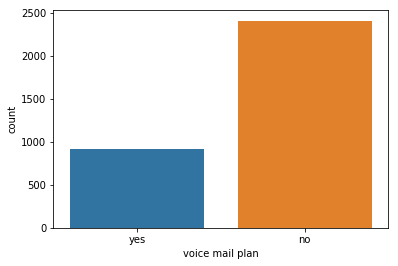

In [112]:
sns.countplot(df['voice mail plan'])
plt.show()

In [113]:
plt.close()

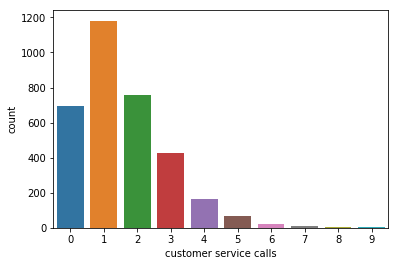

In [114]:
sns.countplot(df['customer service calls'])
plt.show()

In [115]:
plt.close()

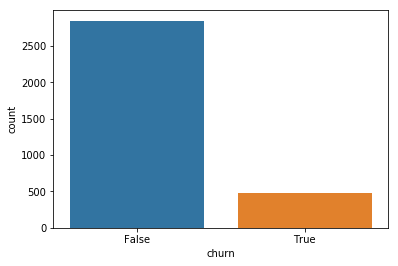

In [116]:
sns.countplot(df['churn'])
plt.show()

In [117]:
plt.close()

# Bivariate Analysis

Suppose we want to see how the observations in our sample 
are distributed in the context of two variables.
To do so, we can build a contingency table using the crosstab method:

In [120]:
#Contingency Table
pd.crosstab(df['churn'], df['state'])

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


In [121]:
pd.crosstab(df['churn'], df['total intl calls'])

total intl calls,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
churn,,,,,,,,,,,,,,,,,,,,,
False,18,129,381,570,540,419,293,191,105,95,...,24,14,13,5,4,2,1,3,1,0
True,0,31,108,98,79,53,43,27,11,14,...,4,1,1,1,3,0,0,0,0,1


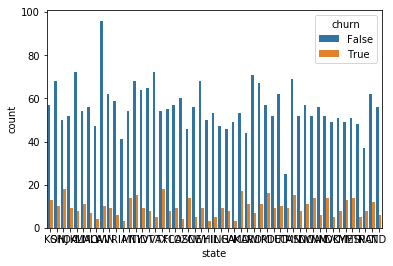

In [123]:
#Visualization
sns.countplot(x = 'state', hue = 'churn', data = df)
plt.show()

In [124]:
plt.close()

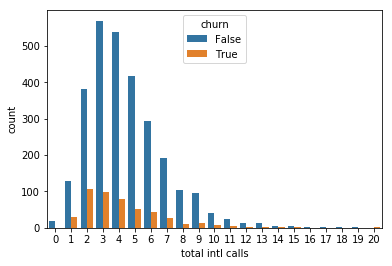

In [126]:
sns.countplot(x = 'total intl calls', hue = 'churn', data = df)
plt.show()

In [127]:
plt.close()

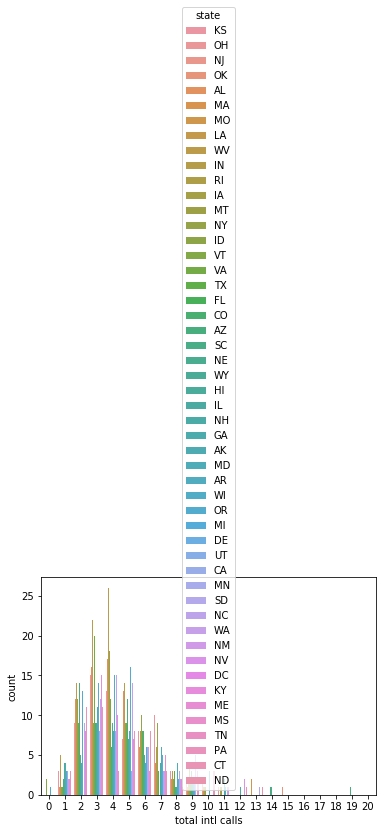

In [128]:
sns.countplot(x = 'total intl calls', hue = 'state', data = df)
plt.show()

In [129]:
plt.close()

In [130]:
#creating correlation matrix
corr_matrix = df[numerical].corr()
print(corr_matrix)

                       account length  number vmail messages  \
account length               1.000000              -0.004628   
number vmail messages       -0.004628               1.000000   
total day minutes            0.006216               0.000778   
total day calls              0.038470              -0.009548   
total eve minutes           -0.006757               0.017562   
total eve calls              0.019260              -0.005864   
total night minutes         -0.008955               0.007681   
total night calls           -0.013176               0.007123   
total intl minutes           0.009514               0.002856   
total intl calls             0.020661               0.013957   

                       total day minutes  total day calls  total eve minutes  \
account length                  0.006216         0.038470          -0.006757   
number vmail messages           0.000778        -0.009548           0.017562   
total day minutes               1.000000         0.0067

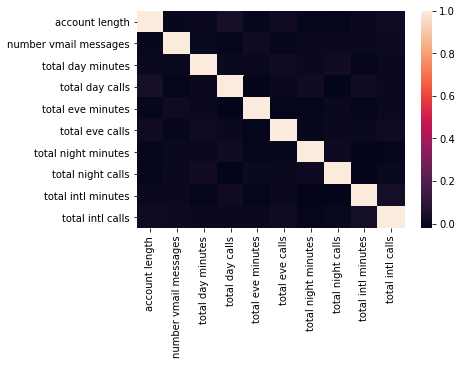

In [131]:
sns.heatmap(corr_matrix)
plt.show()

In [132]:
plt.close()

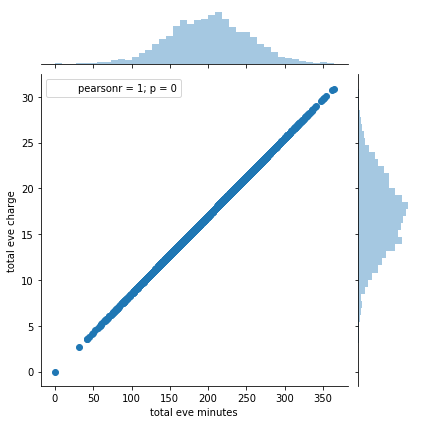

In [141]:
sns.jointplot(x = 'total eve minutes', y = 'total eve charge', data = df, kind = 'scatter')
plt.show()

In [142]:
plt.close()

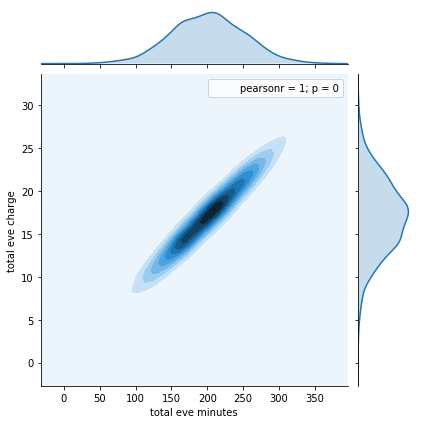

In [143]:
sns.jointplot(x = 'total eve minutes', y = 'total eve charge', data = df, kind = 'kde')
plt.show()

In [144]:
plt.close()

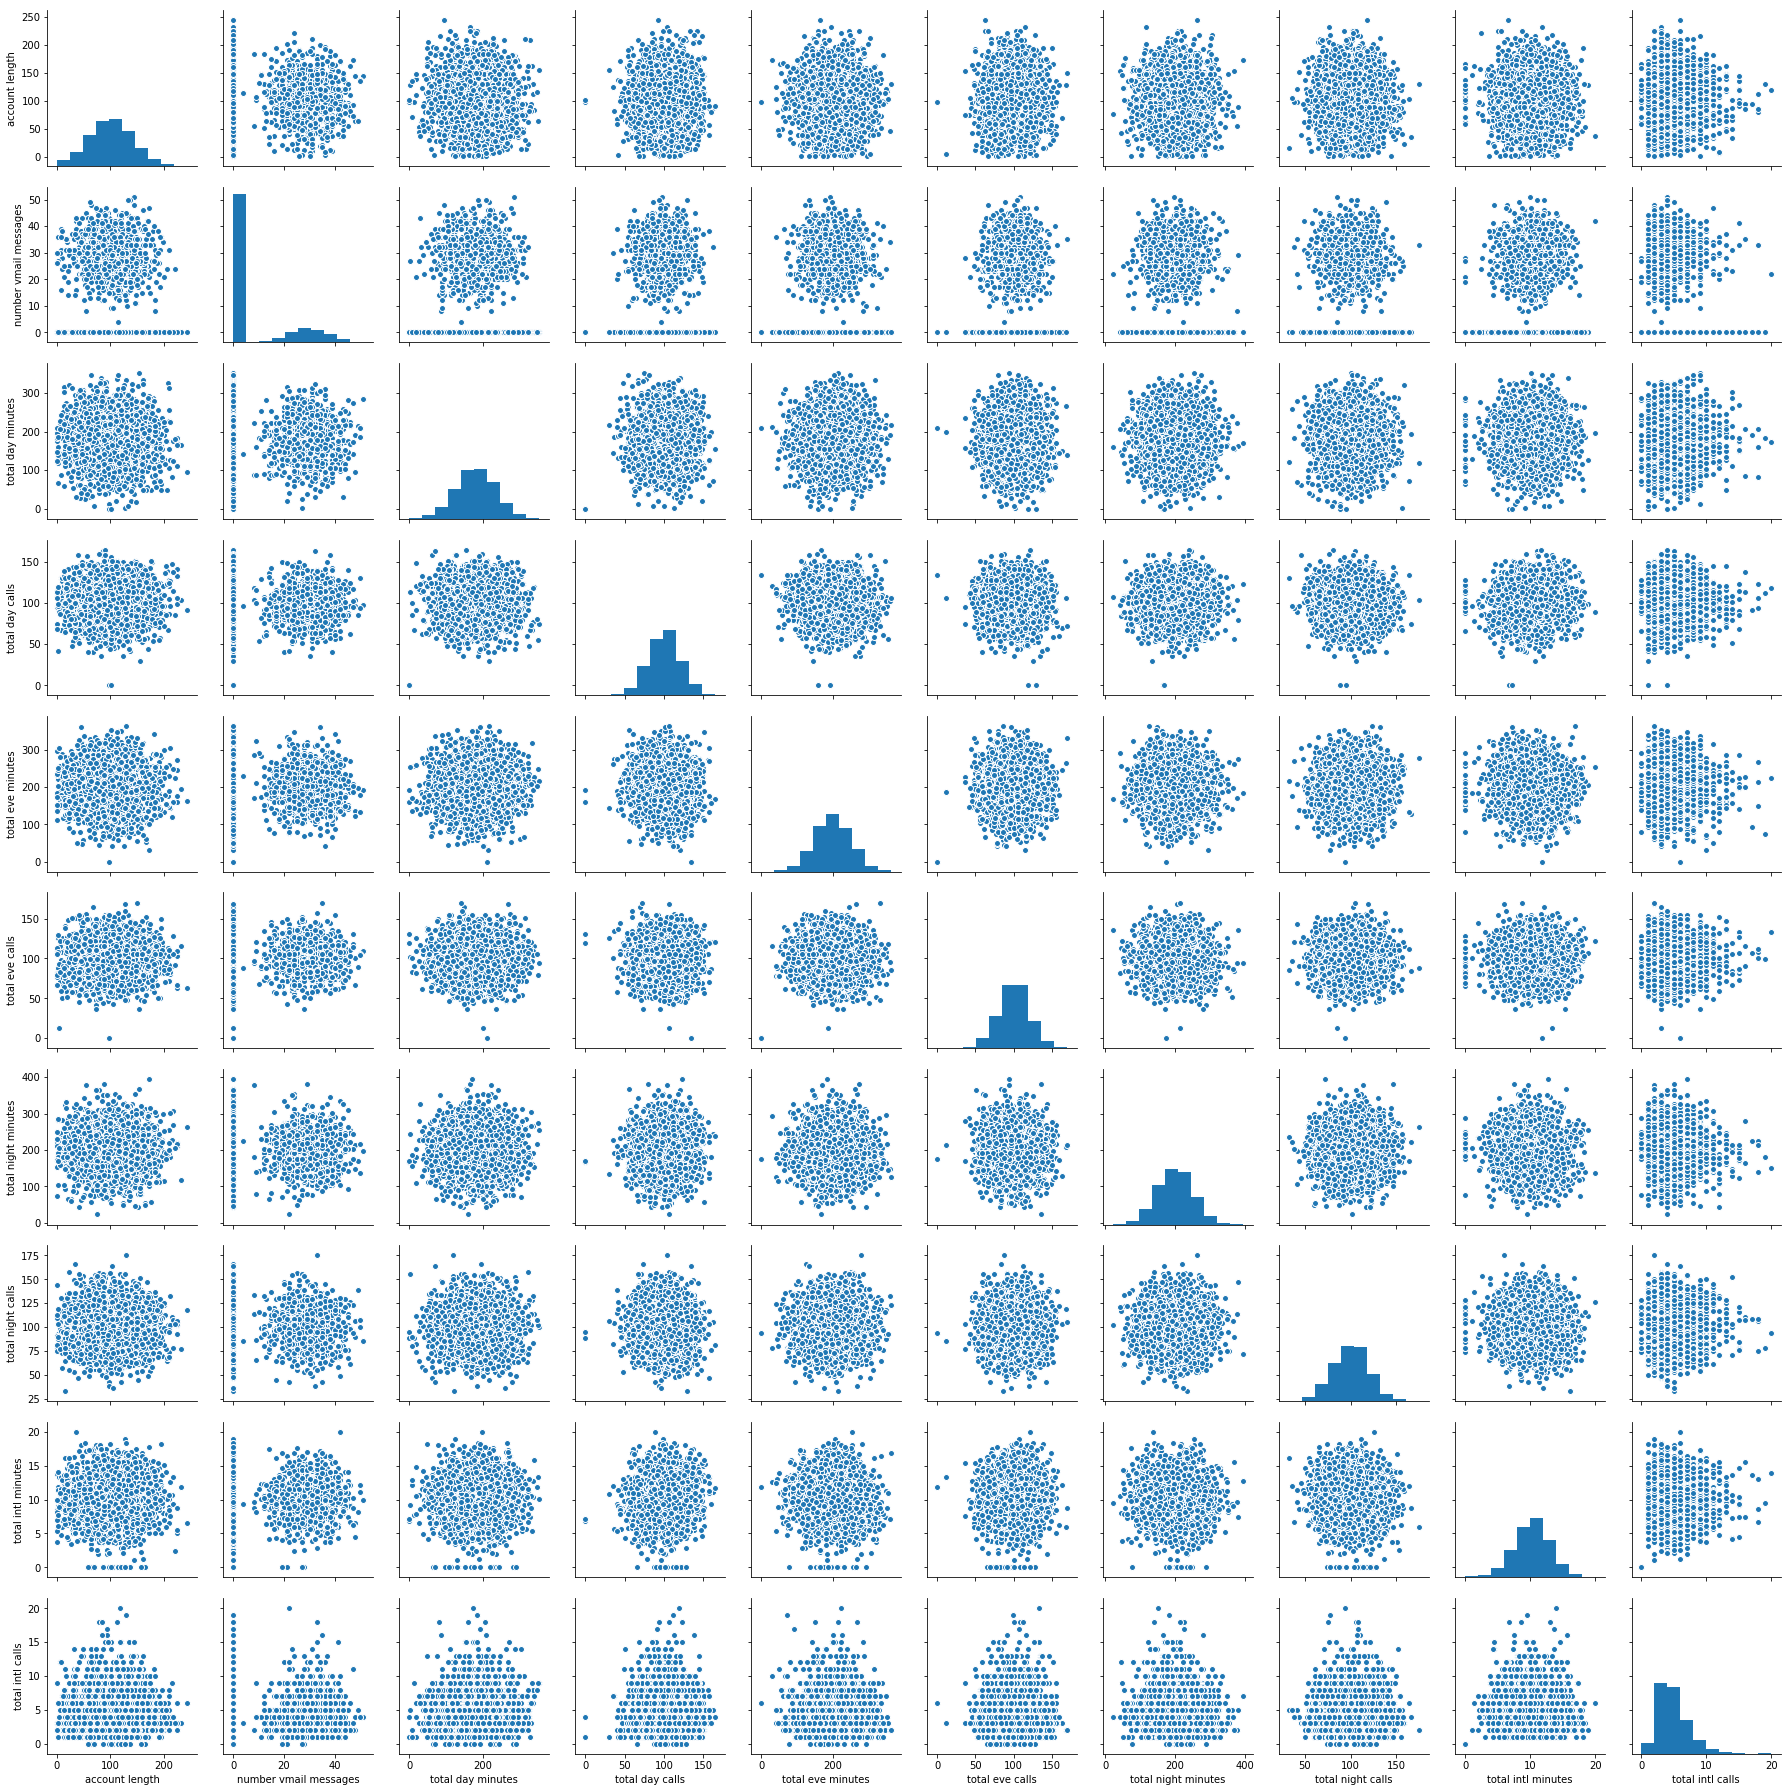

In [145]:
sns.pairplot(df[numerical])
plt.show()

In [146]:
plt.close()

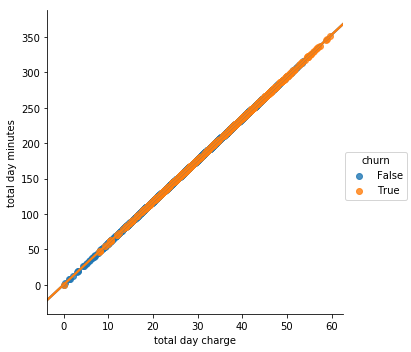

In [147]:
sns.lmplot('total day charge', 'total day minutes', data = df, hue = 'churn', fit_reg = True)
plt.show()

In [148]:
plt.close()